In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [99]:
t = np.linspace(0.01, 1.5, 50)  # Gyr

m = -0.39354186
m_err = 0.15938645
b = -1.906516
b_err = 0.21192405

n = 5000
f_S = 10**(b + b_err * np.random.randn(n)[:, None]) * t ** (m + m_err * np.random.randn(n)[:, None])

In [100]:
lower_env, upper_env = np.percentile(f_S, [16, 84], axis=0)

In [101]:
names = ['V1298 Tau', 'DS Tuc A', 'Qatar-4', 'Kepler-411', 'Kepler-289']
ages = [0.023, 0.045, 0.170, 0.212, 0.65]
for name, age in zip(names, ages):
    lo = 10 ** np.interp(np.log10(age), np.log10(t), np.log10(lower_env))
    mid = 10 ** np.interp(np.log10(age), np.log10(t), np.log10(10**b * t ** m))
    hi = 10 ** np.interp(np.log10(age), np.log10(t), np.log10(upper_env))

    print(name, f"$f_S = {{{mid:.3f}}}^{{+{hi-mid:.3f}}}_{{-{mid-lo:.3f}}}$")

V1298 Tau $f_S = {0.055}^{+0.062}_{-0.030}$
DS Tuc A $f_S = {0.042}^{+0.041}_{-0.021}$
Qatar-4 $f_S = {0.025}^{+0.018}_{-0.011}$
Kepler-411 $f_S = {0.023}^{+0.016}_{-0.010}$
Kepler-289 $f_S = {0.015}^{+0.009}_{-0.006}$


In [102]:
dstuc = np.load('data/dstuc.npy')
v1298 = np.load('data/v1298.npy')
kep411 = np.load('data/kepler411.npy')
qatar4 = np.load('data/qatar4.npy')
kep289 = np.load('data/kepler289.npy')

In [103]:
0.5 * (0.1 + 0.4)

0.25

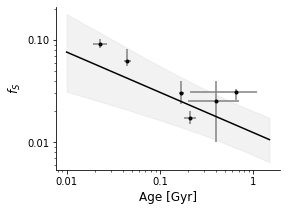

In [104]:
fig, ax = plt.subplots(figsize=(4, 3))

formatter = dict(fmt='.', ecolor='gray', color='k')
ax.errorbar(0.023, v1298[0], xerr=0.004, yerr=v1298[1:3][::-1][:, None], **formatter)
ax.errorbar(0.045, dstuc[0], xerr=0.004, yerr=dstuc[1:3][::-1][:, None], **formatter)
ax.errorbar(0.170, qatar4[0], xerr=0.010, yerr=qatar4[1:3][::-1][:, None], **formatter)
ax.errorbar(0.212, kep411[0], xerr=0.031, yerr=kep411[1:3][::-1][:, None], **formatter)
ax.errorbar(0.400, 0.025, xerr=[[0.2], [0.3]], yerr=[[0.015], [0.015]], **formatter)
ax.errorbar(0.650, kep289[0], xerr=0.44, yerr=kep289[1:3][::-1][:, None], **formatter)

ax.loglog(t, 10**b * t ** m, color='k')

yticks = [0.01, 0.10]
ax.set_yticks(yticks)
ax.set_yticklabels(["{0:.2f}".format(i) for i in yticks])

xticks = [0.01, 0.1, 1, 10]
ax.set_xticks(xticks)
ax.set_xticklabels(["{0:g}".format(i) for i in xticks])

ax.set_xlabel('Age [Gyr]', fontsize=12)
ax.set_ylabel('$f_S$', fontsize=12)
ax.fill_between(t, lower_env, upper_env, alpha=0.2, color='silver', zorder=-10)

for sp in ['right', 'top']:
    ax.spines[sp].set_visible(False)
    
fig.savefig('plots/fs_comparison.pdf', bbox_inches='tight')